<a href="https://colab.research.google.com/github/YunJuyoung1913790/SMU_ITB2022/blob/main/ITB%EA%B3%BC%EC%A0%9C1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 파일 불러오기 전 엑셀 데이터 전처리

1. health_data 복사본 'health_copy'생성



2. 필요한 변수만 남기고 모두 삭제
*   가입자일련번호, 성별코드, 연령대코드, AST, ALT, 감마지티피, 흡연상태를 제외한 변수 삭제



3. 분석하고자 하는 것
*   흡연자의 성별 및 연령 분석
*   흡연자와 금연자(예전에는 흡연하였으나 현재 금연)의 간 기능(AST,ALT)비교
*   흡연자와 금연자의 간 수치 비교

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# csv 데이터 가져오기
health = pd.read_csv("/content/drive/My Drive/ITB/Colab Notebooks/health_copy.csv")

display(health.head(10)) # 처음 10행 확인
print(health.info())     # 10000행의 데이터

,가입자일련번호,성별코드,연령대코드,시력L,시력R,평균시력,청력L,청력R,청력합,수축기혈압,...,요단백,혈청크레아티닌,AST,ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석
0,1,M,9,1.2,1.5,1.35,1,1,2,127.0,...,1.0,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN
1,2,F,13,0.8,0.8,0.80,1,1,2,110.0,...,1.0,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN
2,3,F,12,0.6,0.7,0.65,1,1,2,123.0,...,1.0,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN
3,4,M,13,1.0,1.0,1.00,1,2,3,134.0,...,1.0,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0
4,5,F,12,1.5,1.2,1.35,1,1,2,144.0,...,1.0,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN
5,6,M,9,1.2,1.2,1.20,1,1,2,114.0,...,1.0,1.1,25.0,32.0,26.0,Yes,Yes,0,NaN,NaN
6,7,M,9,0.8,0.7,0.75,1,2,3,112.0,...,1.0,0.7,18.0,20.0,35.0,Yes,Yes,1,0.0,1.0
7,8,M,13,0.5,0.5,0.50,1,1,2,131.0,...,1.0,1.2,18.0,17.0,19.0,Yes,No,1,0.0,2.0
8,9,F,17,0.4,0.5,0.45,2,2,4,136.0,...,1.0,0.7,42.0,48.0,39.0,No,No,0,NaN,NaN
9,10,F,14,0.8,0.7,0.75,2,1,3,124.0,...,1.0,0.6,22.0,11.0,10.0,No,No,0,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   가입자일련번호   10000 non-null  int64  
 1   성별코드      10000 non-null  object 
 2   연령대코드     10000 non-null  int64  
 3   시력L       10000 non-null  float64
 4   시력R       10000 non-null  float64
 5   평균시력      10000 non-null  float64
 6   청력L       10000 non-null  int64  
 7   청력R       10000 non-null  int64  
 8   청력합       10000 non-null  int64  
 9   수축기혈압     9912 non-null   float64
 10  이완기혈압     9912 non-null   float64
 11  식전혈당      9912 non-null   float64
 12  총콜레스테롤    4044 non-null   float64
 13  트리글리세라이드  4044 non-null   float64
 14  HDL       4044 non-null   float64
 15  LDL       3977 non-null   float64
 16  혈색소       9912 non-null   float64
 17  요단백       9861 non-null   float64
 18  혈청크레아티닌   9912 non-null   float64
 19  AST       9912 non-null   float64
 20  ALT       9912 non-null   flo

In [28]:
# 감마지티피 이상치 제거
health = health[health['감마지티피'] < 100]
print(health.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9361 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   가입자일련번호   9361 non-null   int64  
 1   성별코드      9361 non-null   object 
 2   연령대코드     9361 non-null   int64  
 3   시력L       9361 non-null   float64
 4   시력R       9361 non-null   float64
 5   평균시력      9361 non-null   float64
 6   청력L       9361 non-null   int64  
 7   청력R       9361 non-null   int64  
 8   청력합       9361 non-null   int64  
 9   수축기혈압     9361 non-null   float64
 10  이완기혈압     9361 non-null   float64
 11  식전혈당      9361 non-null   float64
 12  총콜레스테롤    3811 non-null   float64
 13  트리글리세라이드  3811 non-null   float64
 14  HDL       3811 non-null   float64
 15  LDL       3765 non-null   float64
 16  혈색소       9361 non-null   float64
 17  요단백       9311 non-null   float64
 18  혈청크레아티닌   9361 non-null   float64
 19  AST       9361 non-null   float64
 20  ALT       9361 non-null   floa

감마지티피의 정상 수치는 남성 11-63IU/L, 여성 8-35IU/L이다. 따라서 감마지티피가 100이상인 경우, 이상치로 판단하고 해당 사례(639개)를 제거한다.

## 금연자(흡연상태=NotNow)와 흡연자(흡연상태=Yes)를 구분하여 데이터 분석을 실시한다.

흡연자와 미흡연자가 아닌, 흡연자와 금연자를 비교하는 것은 금연의 효과를 도출하고, 이를 금연 캠페인 및 기타 공익광고를 위한 정보로 활용하기 위함이다.

In [29]:
# 금연자 데이터프레임 추출
smokenn = health[(health['흡연상태']=='NotNow')]
display(smokenn.head(10))
# 흡연자 데이터프레임 추출
smoke = health[(health['흡연상태']=='Yes')]
display(smoke.head(10))

,가입자일련번호,성별코드,연령대코드,시력L,시력R,평균시력,청력L,청력R,청력합,수축기혈압,...,요단백,혈청크레아티닌,AST,ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석
26,27,M,11,1.5,1.0,1.25,1,1,2,139.0,...,1.0,0.8,37.0,29.0,20.0,NotNow,Yes,0,NaN,NaN
28,29,M,11,1.0,1.0,1.00,1,1,2,121.0,...,1.0,0.7,19.0,20.0,29.0,NotNow,Yes,1,1.0,0.0
37,38,M,9,1.0,1.0,1.00,1,1,2,139.0,...,1.0,0.9,27.0,30.0,25.0,NotNow,Yes,1,0.0,1.0
40,41,M,12,1.2,0.8,1.00,1,1,2,110.0,...,1.0,0.9,24.0,21.0,14.0,NotNow,Yes,1,0.0,0.0
44,45,M,12,0.7,0.8,0.75,1,1,2,134.0,...,1.0,0.8,15.0,13.0,18.0,NotNow,Yes,1,0.0,1.0
46,47,M,11,1.5,1.5,1.50,2,1,3,120.0,...,1.0,0.9,23.0,28.0,24.0,NotNow,Yes,0,NaN,NaN
72,73,M,15,0.7,0.9,0.80,1,1,2,138.0,...,1.0,0.7,17.0,17.0,15.0,NotNow,Yes,0,NaN,NaN
73,74,F,12,1.0,1.0,1.00,1,1,2,99.0,...,1.0,0.5,23.0,18.0,29.0,NotNow,Yes,0,NaN,NaN
89,90,M,9,1.5,1.5,1.50,1,1,2,111.0,...,1.0,0.8,26.0,33.0,54.0,NotNow,Yes,1,0.0,0.0
90,91,M,13,1.0,1.2,1.10,1,1,2,135.0,...,1.0,0.8,24.0,31.0,22.0,NotNow,Yes,0,NaN,NaN


,가입자일련번호,성별코드,연령대코드,시력L,시력R,평균시력,청력L,청력R,청력합,수축기혈압,...,요단백,혈청크레아티닌,AST,ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석
5,6,M,9,1.2,1.2,1.20,1,1,2,114.0,...,1.0,1.1,25.0,32.0,26.0,Yes,Yes,0,NaN,NaN
6,7,M,9,0.8,0.7,0.75,1,2,3,112.0,...,1.0,0.7,18.0,20.0,35.0,Yes,Yes,1,0.0,1.0
7,8,M,13,0.5,0.5,0.50,1,1,2,131.0,...,1.0,1.2,18.0,17.0,19.0,Yes,No,1,0.0,2.0
11,12,F,11,0.6,0.5,0.55,1,1,2,100.0,...,1.0,0.6,31.0,23.0,24.0,Yes,Yes,0,NaN,NaN
12,13,M,14,0.8,0.7,0.75,1,1,2,130.0,...,1.0,0.8,21.0,21.0,41.0,Yes,Yes,1,0.0,0.0
15,16,M,10,0.6,0.3,0.45,1,1,2,121.0,...,1.0,0.9,23.0,26.0,48.0,Yes,Yes,0,NaN,NaN
18,19,M,10,0.9,1.2,1.05,1,1,2,136.0,...,1.0,1.0,17.0,18.0,76.0,Yes,Yes,0,NaN,NaN
23,24,M,10,1.0,1.2,1.10,1,1,2,142.0,...,1.0,1.1,129.0,147.0,57.0,Yes,Yes,0,NaN,NaN
32,33,F,9,0.8,0.8,0.80,1,1,2,110.0,...,1.0,0.8,25.0,20.0,13.0,Yes,Yes,0,NaN,NaN
41,42,F,9,1.5,1.5,1.50,1,1,2,130.0,...,1.0,0.7,15.0,9.0,15.0,Yes,Yes,0,NaN,NaN


In [39]:
#흡연자 연령대 및 성별 분석
#흡연자 연령대별로 묶기
smoke_age = smoke.groupby('연령대코드')
display(smoke_age.first())
smoke_age1 = smoke_age.size() #연령대 별 인원수 파악
smoke_age1
#흡연자 성별로 묶기
smoke_gender = smoke.groupby('성별코드')
display(smoke_gender.first())
smoke_g1 = smoke_gender.size() #성별 별 인원수 파악
smoke_g1

,가입자일련번호,성별코드,시력L,시력R,평균시력,청력L,청력R,청력합,수축기혈압,이완기혈압,...,요단백,혈청크레아티닌,AST,ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석
연령대코드,,,,,,,,,,,,,,,,,,,,,
9,6,M,1.2,1.2,1.20,1,1,2,114.0,72.0,...,1.0,1.1,25.0,32.0,26.0,Yes,Yes,0,0.0,1.0
10,16,M,0.6,0.3,0.45,1,1,2,121.0,73.0,...,1.0,0.9,23.0,26.0,48.0,Yes,Yes,0,0.0,1.0
11,12,F,0.6,0.5,0.55,1,1,2,100.0,68.0,...,1.0,0.6,31.0,23.0,24.0,Yes,Yes,0,1.0,1.0
12,266,M,0.5,0.7,0.60,1,1,2,116.0,78.0,...,1.0,1.4,18.0,16.0,18.0,Yes,No,1,0.0,1.0
13,8,M,0.5,0.5,0.50,1,1,2,131.0,79.0,...,1.0,1.2,18.0,17.0,19.0,Yes,No,1,0.0,2.0
14,13,M,0.8,0.7,0.75,1,1,2,130.0,80.0,...,1.0,0.8,21.0,21.0,41.0,Yes,Yes,1,0.0,0.0
15,113,F,0.5,0.8,0.65,1,1,2,128.0,82.0,...,1.0,0.7,13.0,17.0,16.0,Yes,Yes,0,0.0,0.0
16,415,M,0.4,0.7,0.55,1,1,2,103.0,52.0,...,1.0,1.0,16.0,16.0,17.0,Yes,No,0,1.0,1.0
17,453,M,0.5,0.5,0.50,1,1,2,132.0,82.0,...,1.0,1.1,39.0,44.0,90.0,Yes,No,1,0.0,0.0


,가입자일련번호,연령대코드,시력L,시력R,평균시력,청력L,청력R,청력합,수축기혈압,이완기혈압,...,요단백,혈청크레아티닌,AST,ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석
성별코드,,,,,,,,,,,,,,,,,,,,,
F,12,11,0.6,0.5,0.55,1,1,2,100.0,68.0,...,1.0,0.6,31.0,23.0,24.0,Yes,Yes,0,0.0,0.0
M,6,9,1.2,1.2,1.20,1,1,2,114.0,72.0,...,1.0,1.1,25.0,32.0,26.0,Yes,Yes,0,0.0,1.0


성별코드
F     116
M    1480
dtype: int64

In [31]:
#matplotlib 활용해서 산점도 그래프 그리기

%matplotlib inline
import matplotlib as mpl               # 기본 설정
import matplotlib.pyplot as plt        # 그래프 관련
import matplotlib.font_manager as fm   # 폰트 관련
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 부호가 깨지는 것 방지

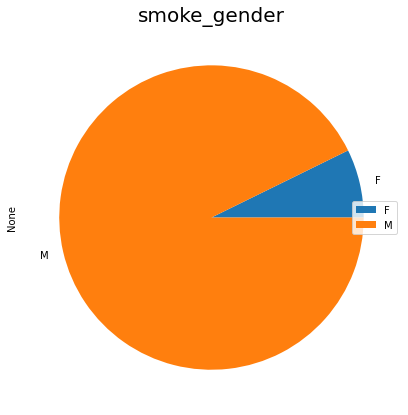

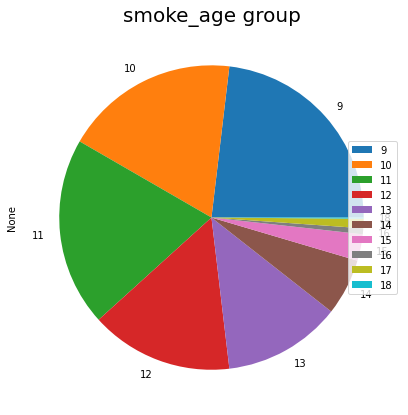

In [32]:
#흡연자의 성별 분포를 알아보는 파이차트 만들기
smoke_g1.plot(kind='pie', figsize=(7,7))
plt.title('smoke_gender', size = 20)
plt.legend(smoke_g1.index, loc = 'right')
plt.show()
#흡연자의 연령대를 알아보는 파이차트 만들기
smoke_age1.plot(kind='pie', figsize=(7,7))
plt.title('smoke_age group', size = 20)
plt.legend(smoke_age1.index, loc = 'right')
plt.show()

흡연자의 성별 분석 결과, 남성이 여성에 비해 압도적으로 많은 인원수를 차지하는 것으로 나타났다. 그리고 이어진 연령 분석 결과, 40대(9,10)와 50대초반(11)이 특히 흡연율이 높은 것으로 드러났다.

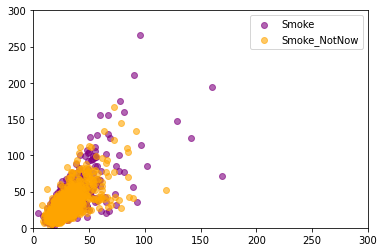

In [41]:
# 흡연자와 금연자의 간악화 수치 산점도 그래프
plt.scatter(smoke['AST'], smoke['ALT'], color = 'purple', alpha = 0.6, label = 'Smoke')
plt.scatter(smokenn['AST'], smokenn['ALT'], color = 'orange', alpha = 0.6, label = 'Smoke_NotNow')
plt.axis([0, 300, 0,300])
plt.legend()

간손상 수치를 나타내는 AST와 ALT를 함께 살펴본 결과, 흡연자의 간손상 수치가 금연자의 간손상 수치보다 더 높게 나타났다. 이는 흡연이 간의 기능을 악화시키며 흡연자가 금연을 하는 경우에는 간의 기능이 개선될 수 있음을 시사한다.

In [35]:
# 흡연자와 금연자 연령대별 감마지티피 추이 비교
# 흡연자를 연령대별로 묶은 새로운 df생성
smoke_age.first()
smoke_a = pd.DataFrame(smoke_age.first())
# '연령대코드' 변수 추가
smoke_a.insert(0,'연령대변수', ['9','10','11','12','13','14','15','16','17','18'])
display(smoke_a.head(10))


,연령대변수,가입자일련번호,성별코드,시력L,시력R,평균시력,청력L,청력R,청력합,수축기혈압,...,요단백,혈청크레아티닌,AST,ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석
연령대코드,,,,,,,,,,,,,,,,,,,,,
9,9,6,M,1.2,1.2,1.20,1,1,2,114.0,...,1.0,1.1,25.0,32.0,26.0,Yes,Yes,0,0.0,1.0
10,10,16,M,0.6,0.3,0.45,1,1,2,121.0,...,1.0,0.9,23.0,26.0,48.0,Yes,Yes,0,0.0,1.0
11,11,12,F,0.6,0.5,0.55,1,1,2,100.0,...,1.0,0.6,31.0,23.0,24.0,Yes,Yes,0,1.0,1.0
12,12,266,M,0.5,0.7,0.60,1,1,2,116.0,...,1.0,1.4,18.0,16.0,18.0,Yes,No,1,0.0,1.0
13,13,8,M,0.5,0.5,0.50,1,1,2,131.0,...,1.0,1.2,18.0,17.0,19.0,Yes,No,1,0.0,2.0
14,14,13,M,0.8,0.7,0.75,1,1,2,130.0,...,1.0,0.8,21.0,21.0,41.0,Yes,Yes,1,0.0,0.0
15,15,113,F,0.5,0.8,0.65,1,1,2,128.0,...,1.0,0.7,13.0,17.0,16.0,Yes,Yes,0,0.0,0.0
16,16,415,M,0.4,0.7,0.55,1,1,2,103.0,...,1.0,1.0,16.0,16.0,17.0,Yes,No,0,1.0,1.0
17,17,453,M,0.5,0.5,0.50,1,1,2,132.0,...,1.0,1.1,39.0,44.0,90.0,Yes,No,1,0.0,0.0


In [36]:
# 금연자 연령대별로 묶기
smokenn_age = smokenn.groupby('연령대코드')
smokenn_age.first()
# 금연자 연령대별로 묶은 새로운 df생성
smokenn_a = pd.DataFrame(smokenn_age.first())
# '연령대코드' 변수 추가
smokenn_a.insert(0,'연령대변수', ['9','10','11','12','13','14','15','16','17','18'])
display(smokenn_a.head(10))

,연령대변수,가입자일련번호,성별코드,시력L,시력R,평균시력,청력L,청력R,청력합,수축기혈압,...,요단백,혈청크레아티닌,AST,ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석
연령대코드,,,,,,,,,,,,,,,,,,,,,
9,9,38,M,1.0,1.0,1.00,1,1,2,139.0,...,1.0,0.9,27.0,30.0,25.0,NotNow,Yes,1,0.0,1.0
10,10,191,M,2.0,1.5,1.75,1,1,2,119.0,...,1.0,1.0,21.0,21.0,32.0,NotNow,Yes,0,1.0,1.0
11,11,27,M,1.5,1.0,1.25,1,1,2,139.0,...,1.0,0.8,37.0,29.0,20.0,NotNow,Yes,0,1.0,0.0
12,12,41,M,1.2,0.8,1.00,1,1,2,110.0,...,1.0,0.9,24.0,21.0,14.0,NotNow,Yes,1,0.0,0.0
13,13,91,M,1.0,1.2,1.10,1,1,2,135.0,...,1.0,0.8,24.0,31.0,22.0,NotNow,Yes,0,0.0,1.0
14,14,106,M,0.8,1.0,0.90,1,1,2,148.0,...,1.0,1.2,35.0,45.0,29.0,NotNow,Yes,0,1.0,1.0
15,15,73,M,0.7,0.9,0.80,1,1,2,138.0,...,1.0,0.7,17.0,17.0,15.0,NotNow,Yes,0,0.0,0.0
16,16,722,M,0.6,0.7,0.65,1,2,3,125.0,...,1.0,0.7,17.0,14.0,36.0,NotNow,Yes,1,0.0,0.0
17,17,488,M,0.3,0.7,0.50,2,1,3,98.0,...,1.0,1.2,16.0,10.0,31.0,NotNow,No,0,0.0,0.0


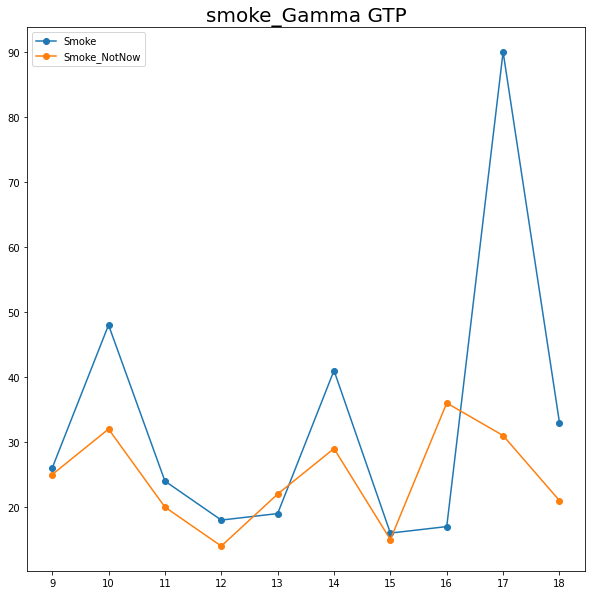

In [37]:
# 흡연자와 금연자의 감마지티피 비교
fig = plt.figure(figsize =(10,10))
fig.set_facecolor('white')
ax = fig.add_subplot()
ax.plot(smoke_a['연령대변수'], smoke_a['감마지티피'], marker='o',markersize=6, label='Smoke')
ax.plot(smokenn_a['연령대변수'], smokenn_a['감마지티피'], marker='o',markersize=6, label='Smoke_NotNow')
plt.title('smoke_Gamma GTP', fontsize = 20)
ax.legend() 
plt.show()

흡연자의 감마지티피는 금연자의 감마지티피보다 대체로 높은 값을 갖는다. 앞선 '흡연 집단 연령분석'에서 상당비율을 차지한 40대 후반(연령대코드:10)의 감마지티피 값이 정상치인 남성 11-63IU/L와 여성 8-35IU/L의 상한선에 가깝거나 혹은 초과한다는 사실에 미루어 봤을 때 흡연자는 간염에 걸릴 위험이 높음을 알 수 있다.